# Decision Tree Regression

In [8]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Reading dataset

In [9]:
import pandas as pd
df = pd.read_csv("concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Step 2 - Perform basic data quality checks

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [11]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(25)

In [13]:
df = df.drop_duplicates(keep="first")

In [14]:
df = df.reset_index(drop=True)
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Step 3 - Seperate X and Y(concrete strength)

In [15]:
X = df.drop(columns=["concrete_compressive_strength"])
Y = df[["concrete_compressive_strength"]]

In [16]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [17]:
Y.head()

,concrete_compressive_strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


### Step 4 - Apply preprocessing on X

In [18]:
X.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
dtype: object

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [22]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375


### Step 5 - Apply Train Test split

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [24]:
xtrain.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
78,2.422696,-0.836471,-0.865375,-1.888315,3.746272,-1.576930,1.506987,-0.672758
29,1.882868,-0.836471,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.609967
280,-0.014683,-0.836471,0.652326,-1.006874,0.974606,-0.006149,1.281584,-0.672758
507,1.508919,-0.836471,-0.865375,1.684334,-1.019640,-1.753610,-0.659875,-0.280312
652,-1.072287,2.068510,-0.865375,1.004499,-1.019640,0.015775,-0.997357,-0.609967


In [25]:
ytrain.head()

,concrete_compressive_strength
78,41.30
29,38.60
280,23.14
507,23.85
652,15.75


In [26]:
xtest.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
926,-1.207484,0.843588,-0.865375,-0.186384,0.332391,0.326578,0.616581,-0.280312
630,-1.496096,1.298725,-0.865375,1.004499,-1.019640,-0.208623,0.341365,-0.280312
682,-1.204608,0.347814,-0.865375,0.465320,-1.019640,-1.113949,2.122177,0.692955
514,1.930810,-0.836471,-0.865375,0.465320,-1.019640,-0.492343,-0.753274,-0.609967
365,2.123537,-0.836471,-0.865375,0.840401,-0.512629,1.934758,-1.986144,-0.280312


In [27]:
ytest.head()

,concrete_compressive_strength
926,19.01
630,24.29
682,26.32
514,34.57
365,44.13


### Step 6 - Model building and tuning

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf= 5,
    criterion="squared_error"
)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [30]:
model.score(xtrain, ytrain)

0.25516987138413816

In [31]:
model.score(xtest, ytest)

0.2672543247109047

### Hyperparameter tuning

In [55]:
params = {
    "max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [5, 6, 7, 8, 9],
    "criterion": ["squared_error", "absolute_error"]
}

In [56]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(
    estimator=dtr, param_grid= params, scoring="r2", cv=5
)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='r2')

In [57]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 14, 'min_samples_split': 5}

In [58]:
gscv.best_score_

np.float64(0.804287863287865)

In [59]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=14, min_samples_split=5)

### Step 7- Model Evaluation

In [60]:
best_dtr.score(xtrain, ytrain)

0.983193900273473

In [61]:
best_dtr.score(xtest, ytest)

0.8713199374963525

In [62]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [63]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [64]:
print("Training Results")
evaluate_model(best_dtr, xtrain, ytrain)

Training Results
RMSE : 2.08
MAE : 1.28
MAPE : 0.0410
R2 Score : 0.9832


In [65]:
print("Testing Results")
evaluate_model(best_dtr, xtest, ytest)

Testing Results
RMSE : 6.20
MAE : 4.24
MAPE : 0.1570
R2 Score : 0.8713


In [66]:
ypred_test = best_dtr.predict(xtest)
ypred_test[0:5]

array([19.01      , 21.47      , 18.975     , 48.97333333, 44.015     ])

In [67]:
ytest.head()

,concrete_compressive_strength
926,19.01
630,24.29
682,26.32
514,34.57
365,44.13


### Plot the decision tree

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

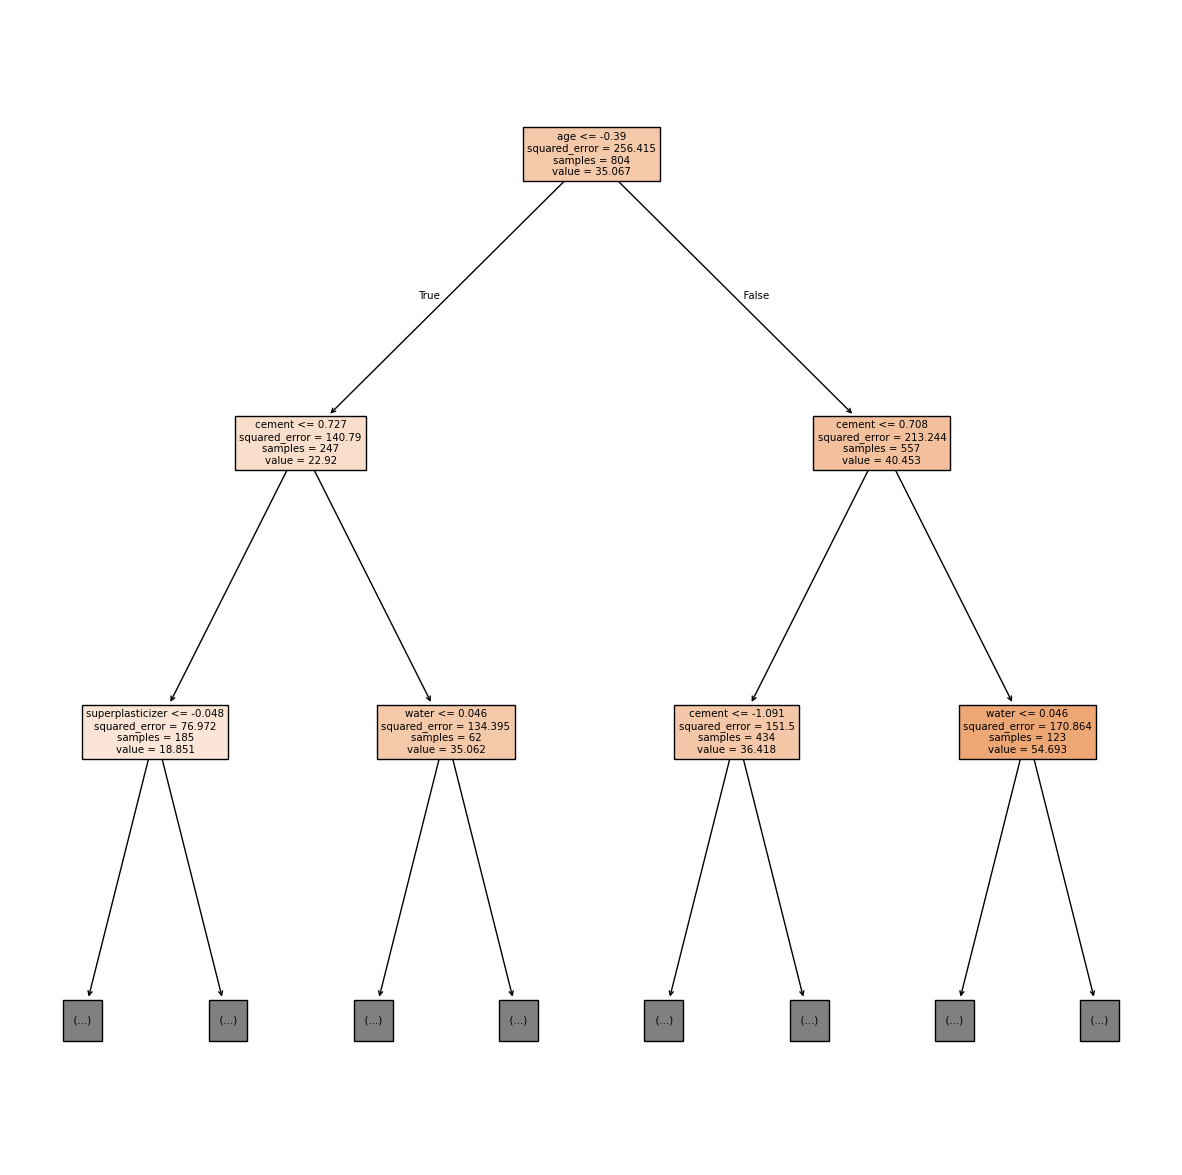

In [69]:
plt.figure(figsize=(15, 15))
plot_tree(
    best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2
)
plt.show()

In [70]:
best_dtr.feature_importances_

array([0.36229721, 0.09402656, 0.01116132, 0.12123094, 0.03933649,
       0.0172316 , 0.03076726, 0.32394862])

In [71]:
xtrain.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [72]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

cement                0.362297
blast_furnace_slag    0.094027
fly_ash               0.011161
water                 0.121231
superplasticizer      0.039336
coarse_aggregate      0.017232
fine_aggregate        0.030767
age                   0.323949
dtype: float64

In [73]:
imp.sort_values()

fly_ash               0.011161
coarse_aggregate      0.017232
fine_aggregate        0.030767
superplasticizer      0.039336
blast_furnace_slag    0.094027
water                 0.121231
age                   0.323949
cement                0.362297
dtype: float64

<Axes: >

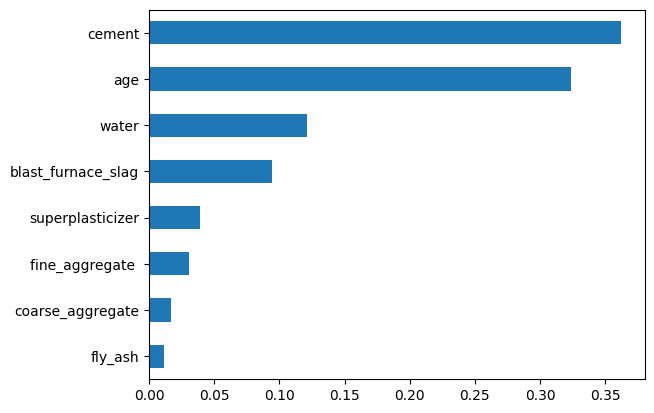

In [74]:
imp.sort_values().plot(kind="barh")

### Step 9 - Out of Sample prediction

In [75]:
xnew = pd.read_csv("Concrete Sample.csv")
xnew

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,400,100.0,20,200,2.0,900,550,30
1,510,NaN,0,250,NaN,800,300,300


In [76]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [77]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.163735,0.324593,-0.553732,0.840401,-0.681633,-0.959193,-2.773188,-0.248916
1,2.218463,-0.604258,-0.865375,3.184659,0.011284,-2.248832,-5.886495,3.989504


In [78]:
preds = best_dtr.predict(xnew_pre)
preds

array([36.94      , 52.23333333])

In [79]:
xnew["concrete_strength"] = preds

In [80]:
xnew

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,400,100.0,20,200,2.0,900,550,30,36.940000
1,510,NaN,0,250,NaN,800,300,300,52.233333


In [81]:
xnew.to_csv("Results.csv", index=False)